In [211]:
#imports here
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

#EDA tools
from datetime import datetime
from dateutil.parser import parser
import string
import re

#SKlearn tools
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [158]:
#load data here
train = pd.read_csv('./data/input/train.csv')
test = pd.read_csv('.//data/input/test.csv')
weather = pd.read_csv('./data/input/weather.csv') #not sure if this is the total dataset.

In [217]:
#check out the data
print(train.dtypes)
base = train
train.head()

Date                      datetime64[ns]
Address                           object
Species                           object
Block                              int64
Street                            object
Trap                              object
AddressNumberAndStreet            object
Latitude                         float64
Longitude                        float64
AddressAccuracy                    int64
NumMosquitos                       int64
WnvPresent                         int64
dtype: object


,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0


In [160]:
#uses list comp to change the type from string to a datetime 
train['Date'] = [datetime.strptime(x, '%Y-%m-%d') for x in train['Date']]

In [161]:
weather['Date'] = [datetime.strptime(x, '%Y-%m-%d') for x in weather['Date']]

In [162]:
train['Species'] = train['Species'].str.strip('CULEX ')

In [163]:
train['Species'].value_counts()/len(train['Species'])
train['Trap'].value_counts()

T900     750
T115     542
T138     314
T002     185
T135     183
T054     163
T128     160
T151     156
T212     152
T090     151
T114     148
T158     147
T048     146
T031     146
T903     140
T008     139
T011     133
T209     130
T200     129
T073     128
T030     126
T003     122
T094     121
T028     117
T066     116
T074     115
T047     114
T221     112
T102     112
T009     111
        ... 
T150      22
T219      21
T154      21
T156      21
T206      21
T162      21
T070      20
T075      20
T071      19
T142      18
T097      17
T034      17
T050      17
T001      15
T044      15
T051      15
T060      15
T149      14
T157      14
T005      14
T072      13
T004      12
T054C      9
T229       8
T078       8
T238       7
T094B      5
T076       5
T237       3
T040       2
Name: Trap, Length: 136, dtype: int64

In [164]:
train.merge(weather,how='left')

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,...,BR HZ,0,M,0.0,0.00,29.39,30.11,5.8,18,6.5
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,...,BR HZ,M,M,M,0.00,29.44,30.09,5.8,16,7.4
2,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,...,BR HZ,0,M,0.0,0.00,29.39,30.11,5.8,18,6.5
3,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,...,BR HZ,M,M,M,0.00,29.44,30.09,5.8,16,7.4
4,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,...,BR HZ,0,M,0.0,0.00,29.39,30.11,5.8,18,6.5
5,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,...,BR HZ,M,M,M,0.00,29.44,30.09,5.8,16,7.4
6,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,...,BR HZ,0,M,0.0,0.00,29.39,30.11,5.8,18,6.5
7,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,...,BR HZ,M,M,M,0.00,29.44,30.09,5.8,16,7.4
8,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,...,BR HZ,0,M,0.0,0.00,29.39,30.11,5.8,18,6.5
9,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,...,BR HZ,M,M,M,0.00,29.44,30.09,5.8,16,7.4


In [165]:
weather.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,...,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9


In [166]:
df = weather.drop(labels=['Depart','Heat','Cool','CodeSum','Depth','Water1','SnowFall','Sunrise','Sunset'],axis=1)

In [196]:
#created a function to remove M(missing) & T(Trace) information and replace with 0

def remove_M(data):
    try:
        for i in range(len(data.columns)):
            data[str(data.columns[i])].replace(to_replace=['M'],value = 0, inplace=True)
            print(data.columns[i])
    except:
        print(data.columns[i])
        pass

    
def remove_T(data):
    try:
        for i in range(len(data.columns)):
            data[str(data.columns[i])].replace(to_replace=['  T'],value =0, inplace=True)
    except:
        pass

In [202]:
remove_M(df)
remove_T(df)

Station
Date
Tmax
Tmin
Tavg
DewPoint
WetBulb
PrecipTotal
StnPressure
SeaLevel
ResultSpeed
ResultDir
AvgSpeed


In [205]:
train

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0
5,2007-05-29,"1500 West Webster Avenue, Chicago, IL 60614, USA",RESTUANS,15,W WEBSTER AVE,T045,"1500 W WEBSTER AVE, Chicago, IL",41.921600,-87.666455,8,2,0
6,2007-05-29,"2500 West Grand Avenue, Chicago, IL 60654, USA",RESTUANS,25,W GRAND AVE,T046,"2500 W GRAND AVE, Chicago, IL",41.891118,-87.654491,8,1,0
7,2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",PIPIENS/RESTUANS,11,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,1,0
8,2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",RESTUANS,11,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,2,0
9,2007-05-29,"1100 West Chicago Avenue, Chicago, IL 60642, USA",RESTUANS,11,W CHICAGO,T049,"1100 W CHICAGO, Chicago, IL",41.896282,-87.655232,8,1,0


In [225]:
[x for x in train['Species'] if x in ['PIPIENS/RESTUANS','RESTUANS','PIPIENS']]

['PIPIENS/RESTUANS',
 'RESTUANS',
 'RESTUANS',
 'PIPIENS/RESTUANS',
 'RESTUANS',
 'RESTUANS',
 'RESTUANS',
 'PIPIENS/RESTUANS',
 'RESTUANS',
 'RESTUANS',
 'PIPIENS/RESTUANS',
 'PIPIENS/RESTUANS',
 'RESTUANS',
 'PIPIENS/RESTUANS',
 'RESTUANS',
 'RESTUANS',
 'RESTUANS',
 'RESTUANS',
 'PIPIENS',
 'PIPIENS/RESTUANS',
 'RESTUANS',
 'PIPIENS/RESTUANS',
 'PIPIENS/RESTUANS',
 'RESTUANS',
 'RESTUANS',
 'PIPIENS/RESTUANS',
 'RESTUANS',
 'PIPIENS',
 'PIPIENS/RESTUANS',
 'RESTUANS',
 'PIPIENS/RESTUANS',
 'RESTUANS',
 'PIPIENS',
 'RESTUANS',
 'PIPIENS/RESTUANS',
 'RESTUANS',
 'PIPIENS',
 'RESTUANS',
 'PIPIENS/RESTUANS',
 'RESTUANS',
 'RESTUANS',
 'RESTUANS',
 'PIPIENS/RESTUANS',
 'PIPIENS/RESTUANS',
 'RESTUANS',
 'PIPIENS',
 'PIPIENS/RESTUANS',
 'RESTUANS',
 'RESTUANS',
 'RESTUANS',
 'RESTUANS',
 'RESTUANS',
 'RESTUANS',
 'RESTUANS',
 'RESTUANS',
 'RESTUANS',
 'PIPIENS/RESTUANS',
 'RESTUANS',
 'RESTUANS',
 'PIPIENS/RESTUANS',
 'RESTUANS',
 'PIPIENS/RESTUANS',
 'PIPIENS/RESTUANS',
 'RESTUANS',
 'PIP

In [242]:
foo.unique().tolist()

['PIPIENS/RESTUANS',
 'RESTUANS',
 'PIPIENS',
 'SALINARIUS',
 'TERRITANS',
 'TARSALIS',
 'RRATICUS']

In [248]:
X = train[['Trap','Species','Block']]
y = train['WnvPresent']

In [252]:
X['Species']= X['Species'].map(lambda x: 1 if x in ['PIPIENS/RESTUANS','RESTUANS','PIPIENS'] else 0)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [409]:
X['Trap'] = X['Trap'].str.split("T",expand=True)[1]
X['Trap'] = X['Trap'].map(lambda x: x[0:3] if len(x)>3 else x[:])

KeyError: 1

In [410]:
X['Trap'] = X['Trap'].astype('int64')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [411]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=30, random_state=33) 

In [420]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

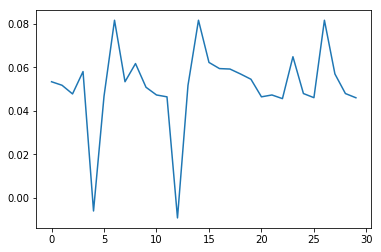

In [429]:
plt.plot(lr.predict(X_test))

array([4.42154122e-05, 5.33221559e-02, 1.81622748e-04])